# 導入套件

In [1]:
import numpy as np
import pandas as pd
from pylab import plt , mpl 
import seaborn as sns # 導入所需套件,plt為繪圖,mpl為字型,sns為圖形

In [2]:
mpl.rcParams['font.family'] = 'serif' # 設定字型
%matplotlib inline     
#使圖形可直接呈現在下方

# 讀取並處理資料

In [3]:
data = pd.read_csv('tr_eikon_eod_data.csv' , index_col = 0 , parse_dates = True) 
# 讀取檔案,將date設為index,若date的日期後面還有如幾點等時間,可用parse_dates = True 刪除,只留下日期
data.head() # 呈現檔案的前5筆資料

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [4]:
data_spx = pd.DataFrame(data['.SPX'])
data_spx.head()

,.SPX
Date,
2010-01-01,NaN
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69


In [5]:
data_spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 34.6 KB


In [6]:
data_spx.dropna(inplace = True) # 將data_spx中有遺漏值那列刪除
data_spx.head()

,.SPX
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98


# 計算波動度

In [7]:
r_disc = data_spx.pct_change() # 間斷型報酬率
r_disc.head(5)

,.SPX
Date,
2010-01-04,NaN
2010-01-05,0.003116
2010-01-06,0.000546
2010-01-07,0.004001
2010-01-08,0.002882


In [8]:
data_spx2 = data_spx.shift(1) 
# 將data_spx的每筆資料向下移一天,用於計算連續型報酬率ln(p1/p0),在計算波動度時習慣用連續型版本
data_spx2.head()

,.SPX
Date,
2010-01-04,NaN
2010-01-05,1132.99
2010-01-06,1136.52
2010-01-07,1137.14
2010-01-08,1141.69


In [9]:
data_spx2['return'] = np.log(data_spx2 / data_spx) # 計算連續型報酬率並在data_spx2新增一欄
data_spx2.head()

,.SPX,return
Date,,
2010-01-04,NaN,NaN
2010-01-05,1132.99,-0.003111
2010-01-06,1136.52,-0.000545
2010-01-07,1137.14,-0.003993
2010-01-08,1141.69,-0.002878


In [10]:
data_spx2['Volatility'] = data_spx2['return'].rolling(252).std()*np.sqrt(252)
# rolling(252):每252筆資料做一次標準差(ex:第一次為1~252,第二次為2~253,第三次為3~254...)
# 將每個標準差進行年化
data_spx2.tail()

,.SPX,return,Volatility
Date,,,
2018-06-25,2754.88,0.013820,0.125021
2018-06-26,2717.07,-0.002202,0.125034
2018-06-27,2723.06,0.008642,0.125072
2018-06-28,2699.63,-0.006160,0.124924
2018-06-29,2716.31,-0.000758,0.124593


# 畫圖

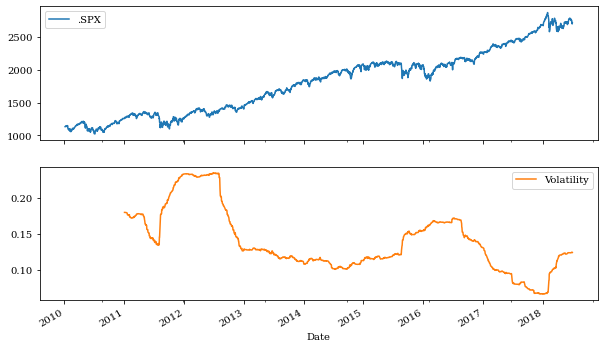

In [11]:
data_spx2[['.SPX' , 'Volatility']].plot( subplots = True , figsize = (10,6)) ;
# 對.SPX和Volatility畫圖
# 用subplots = True 將 .SPX和Volatility分成兩張圖
# 用figsize = (10,6) 設定每張圖的寬(x軸=10)與高(Y軸=6)